In [175]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [138]:
 df = pd.read_csv('/content/BAJAJFINSV.csv')

In [139]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,42.540649,42.545563,41.076778,41.268360,40.812237,186103.0
1,2012-01-03,41.779240,43.031879,41.479588,42.855038,42.381378,229911.0
2,2012-01-04,42.835388,43.110477,40.723091,41.096428,40.642204,290453.0
3,2012-01-05,42.240997,42.240997,41.317482,41.317482,40.860813,246869.0
4,2012-01-06,41.263447,42.344154,41.263447,41.440289,40.982262,326373.0


In [140]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2836,2023-06-23,1507.500000,1519.699951,1483.949951,1501.949951,1501.161011,1237464.0
2837,2023-06-26,1504.449951,1510.849976,1487.199951,1507.550049,1506.758179,647496.0
2838,2023-06-27,1512.000000,1527.349976,1503.000000,1522.949951,1522.149902,763062.0
2839,2023-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2840,2023-06-30,1521.000000,1536.599976,1519.000000,1528.000000,1528.000000,934523.0


In [141]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [142]:
df = df.dropna()

In [143]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,42.540649,42.545563,41.076778,41.268360,40.812237,186103.0
1,2012-01-03,41.779240,43.031879,41.479588,42.855038,42.381378,229911.0
2,2012-01-04,42.835388,43.110477,40.723091,41.096428,40.642204,290453.0
3,2012-01-05,42.240997,42.240997,41.317482,41.317482,40.860813,246869.0
4,2012-01-06,41.263447,42.344154,41.263447,41.440289,40.982262,326373.0
...,...,...,...,...,...,...,...
2835,2023-06-22,1523.000000,1527.199951,1504.849976,1507.650024,1506.858032,966522.0
2836,2023-06-23,1507.500000,1519.699951,1483.949951,1501.949951,1501.161011,1237464.0
2837,2023-06-26,1504.449951,1510.849976,1487.199951,1507.550049,1506.758179,647496.0
2838,2023-06-27,1512.000000,1527.349976,1503.000000,1522.949951,1522.149902,763062.0


In [144]:
df_close = df.reset_index()['Close']

In [145]:
df_close

0         41.268360
1         42.855038
2         41.096428
3         41.317482
4         41.440289
           ...     
2829    1507.650024
2830    1501.949951
2831    1507.550049
2832    1522.949951
2833    1528.000000
Name: Close, Length: 2834, dtype: float64

In [146]:
df.drop(['Open','High','Low','Adj Close','Volume'], axis=1, inplace=True)

In [147]:
df.head()

,Date,Close
0,2012-01-02,41.268360
1,2012-01-03,42.855038
2,2012-01-04,41.096428
3,2012-01-05,41.317482
4,2012-01-06,41.440289


In [148]:
df = df.set_index('Date')

In [149]:
df.index

Index(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
       '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13',
       ...
       '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20', '2023-06-21',
       '2023-06-22', '2023-06-23', '2023-06-26', '2023-06-27', '2023-06-30'],
      dtype='object', name='Date', length=2834)

In [150]:
df.index = pd.to_datetime(df.index)

In [151]:
color_pal = sns.color_palette()

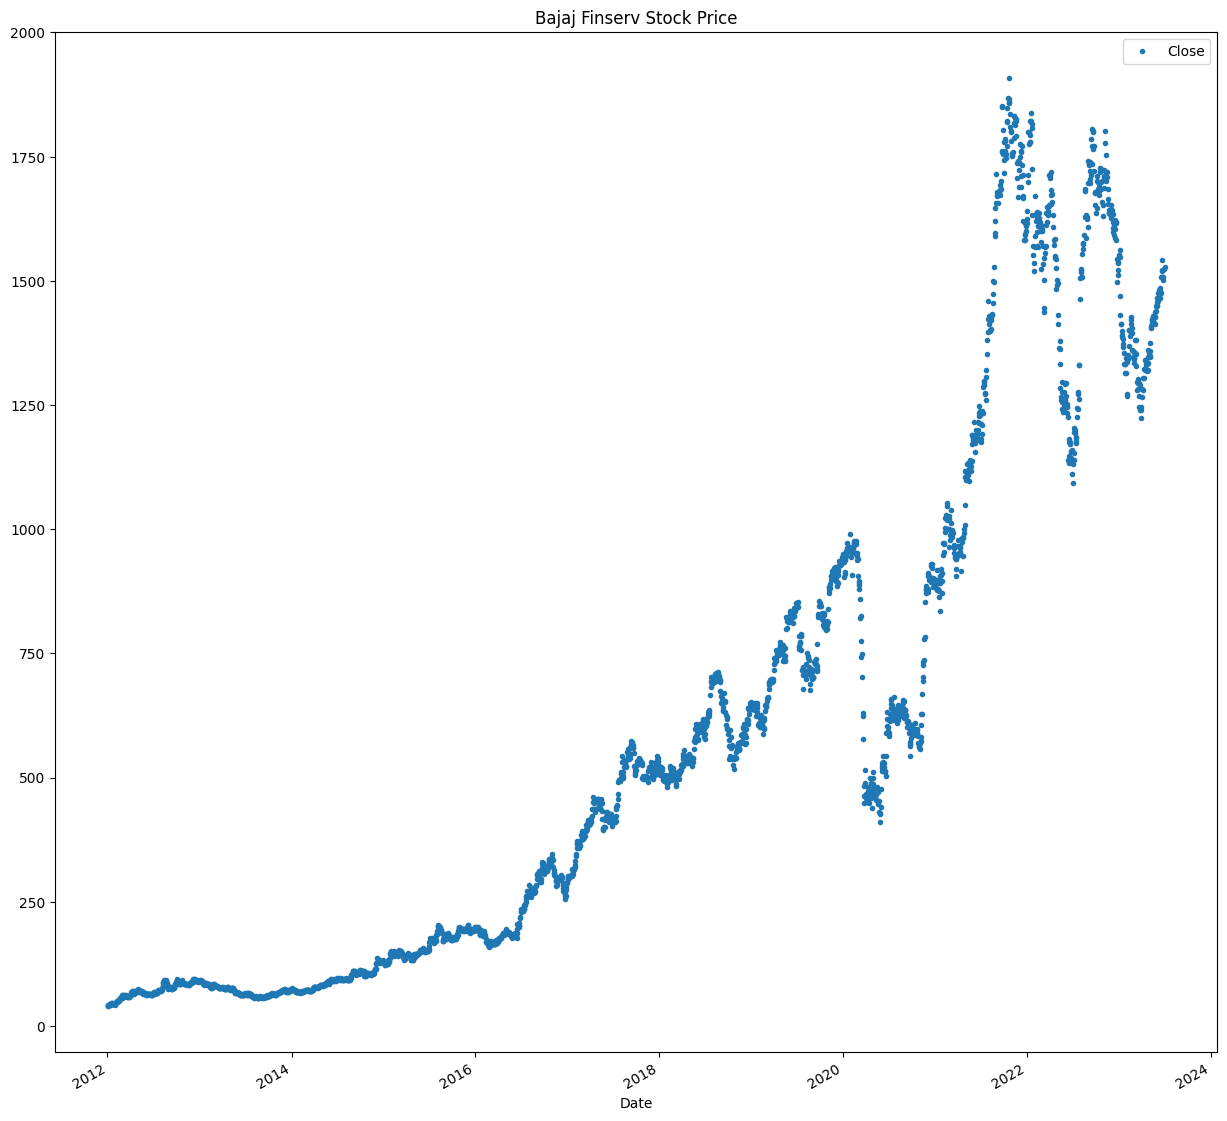

In [154]:
df.plot(style = '.', figsize = (15,15), color = color_pal[0], title = 'Bajaj Finserv Stock Price')
plt.show()


In [152]:
df.index

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2023-06-15', '2023-06-16', '2023-06-19', '2023-06-20',
               '2023-06-21', '2023-06-22', '2023-06-23', '2023-06-26',
               '2023-06-27', '2023-06-30'],
              dtype='datetime64[ns]', name='Date', length=2834, freq=None)

### Train/Test Split

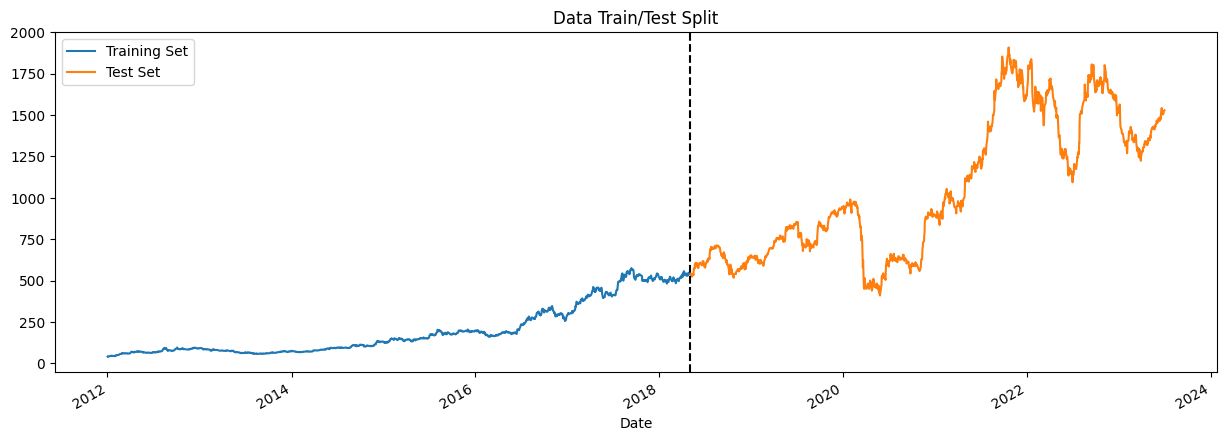

In [158]:
train = df.loc[df.index < '2018-05-04']
test = df.loc[df.index >= '2018-05-04']

fig, ax = plt.subplots(figsize = (15,5))
train.plot(ax = ax, label = 'Training Set', title = 'Data Train/Test Split')
test.plot(ax = ax, label = 'Test Set')
ax.axvline('2018-05-04', color = 'black', ls = '--')
ax.legend(['Training Set', 'Test Set'])

plt.show()

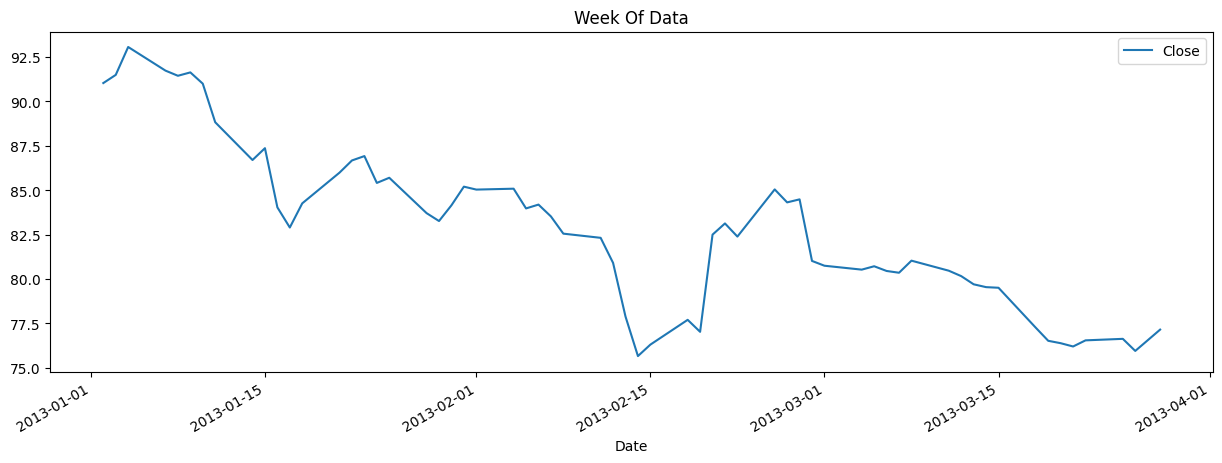

In [161]:
df.loc[(df.index > '01-01-2013') & (df.index < '04-01-2013')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

### Feature Creation

In [167]:
def create_features(df):
#Creates time series features based on time series index
  df = df.copy()
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  df['hour'] = df.index.hour
  return df


In [173]:
df = create_features(df)

### Visualise our Feature/Target Relationship

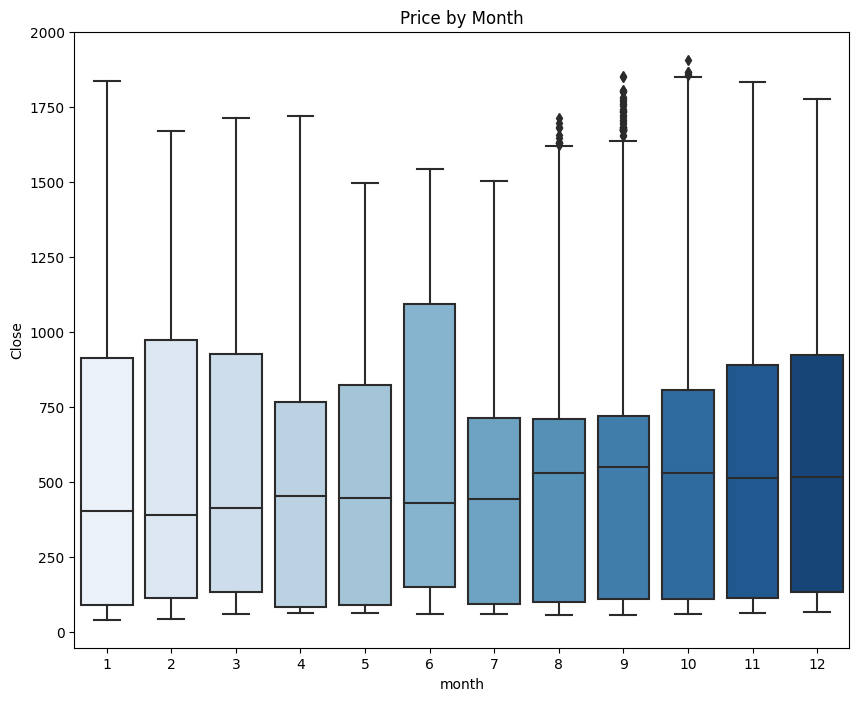

In [171]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Close', palette='Blues')
ax.set_title('Price by Month')
plt.show()

In [177]:
train = create_features(train)
test = create_features(test)

<ipython-input-167-f75d39d7f0ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
<ipython-input-167-f75d39d7f0ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df.index.quarter
<ipython-input-167-f75d39d7f0ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [186]:
features = ['Close', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'hour']
target = 'Close'

In [187]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

### Create our Model

In [185]:
df.columns

Index(['Close', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'hour'], dtype='object')

In [190]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = 100) #prints training and validation score every 100 trees


[0]	validation_0-rmse:250.47020	validation_1-rmse:1125.92739
[100]	validation_0-rmse:92.77106	validation_1-rmse:831.48686
[200]	validation_0-rmse:34.44991	validation_1-rmse:720.02748
[300]	validation_0-rmse:12.83584	validation_1-rmse:674.32743
[400]	validation_0-rmse:4.80526	validation_1-rmse:654.67317
[500]	validation_0-rmse:1.81425	validation_1-rmse:645.68926
[600]	validation_0-rmse:0.69756	validation_1-rmse:641.23997
[700]	validation_0-rmse:0.27644	validation_1-rmse:638.86507
[800]	validation_0-rmse:0.11556	validation_1-rmse:637.60303
[900]	validation_0-rmse:0.05363	validation_1-rmse:636.94274
[999]	validation_0-rmse:0.02979	validation_1-rmse:636.53408


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Feature Importance

In [192]:
reg.feature_importances_

#tells which of the features were more useful in the trees built by the XGB model

array([1.00000000e+00, 4.71260986e-09, 9.82215020e-09, 1.33251605e-08,
       0.00000000e+00, 3.87348242e-09, 0.00000000e+00], dtype=float32)

In [193]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ['importance'],
             )

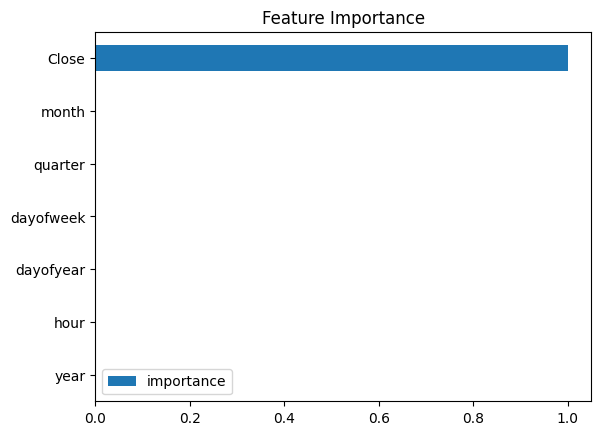

In [194]:
fi.sort_values('importance').plot(kind = 'barh', title = 'Feature Importance')
plt.show()

### Forecast on Test

In [195]:
reg.predict(X_test)

## predictions for the test set is given as a numpy array

array([535.10046, 540.17285, 533.89575, ..., 572.472  , 572.472  ,
       572.472  ], dtype=float32)

In [198]:
test['predictions'] = reg.predict(X_test)

<ipython-input-198-ab8619334f1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = reg.predict(X_test)


In [199]:
df.merge(test[['predictions']], how = 'left', left_index = True, right_index = True) #meaning we will merge the datasets on the index column

,Close,dayofweek,quarter,month,year,dayofyear,hour,predictions
Date,,,,,,,,
2012-01-02,41.268360,0,1,1,2012,2,0,NaN
2012-01-03,42.855038,1,1,1,2012,3,0,NaN
2012-01-04,41.096428,2,1,1,2012,4,0,NaN
2012-01-05,41.317482,3,1,1,2012,5,0,NaN
2012-01-06,41.440289,4,1,1,2012,6,0,NaN
...,...,...,...,...,...,...,...,...
2023-06-22,1507.650024,3,2,6,2023,173,0,572.471985
2023-06-23,1501.949951,4,2,6,2023,174,0,572.471985
2023-06-26,1507.550049,0,2,6,2023,177,0,572.471985


<ipython-input-200-192bdb91a220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = reg.predict(X_test)


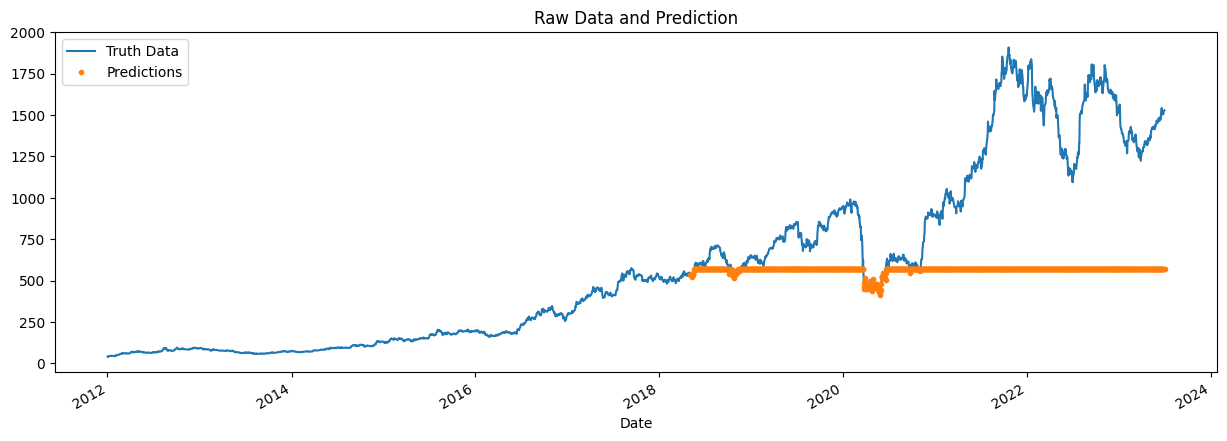

In [200]:
test['predictions'] = reg.predict(X_test)
df = df.merge(test[['predictions']], how='left', left_index=True, right_index=True)
ax = df[['Close']].plot(figsize=(15, 5))
df['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

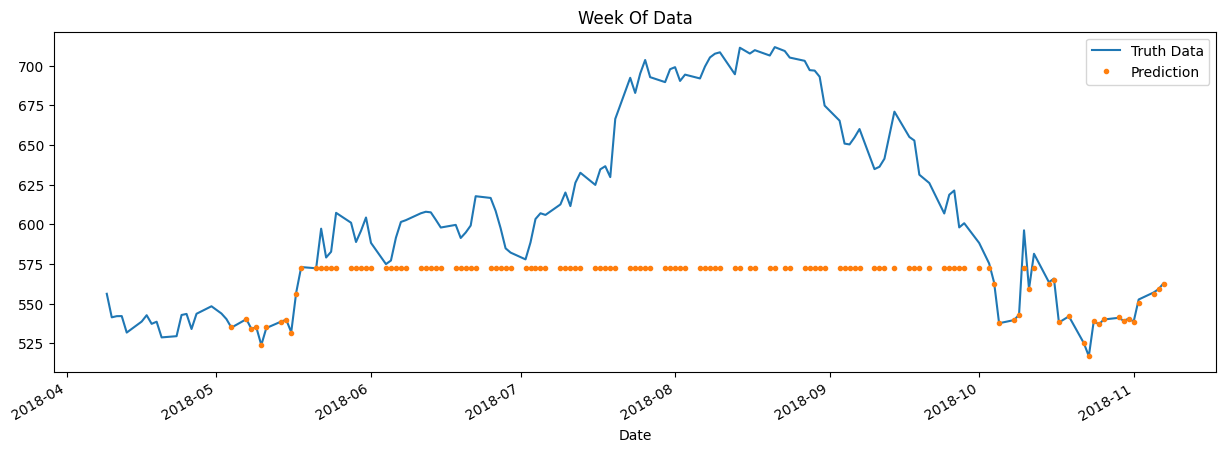

In [201]:
ax = df.loc[(df.index > '04-08-2018') & (df.index < '11-08-2018')]['Close'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df.loc[(df.index > '04-08-2018') & (df.index < '11-08-2018')]['predictions'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [206]:
score = np.sqrt(mean_squared_error(test['Close'], test['predictions']))
print(f'RMSE Score on the Test Set: {score:0.2f}') #upto two decimal
#Gives the RMSE value

RMSE Score on the Test Set: 636.53


### Calculate Error

In [211]:
test['error'] = np.abs(test[target] - test['predictions'])
#loss

<ipython-input-211-6a40c0450264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[target] - test['predictions'])


In [213]:
#to look at the best and worst predicted days
test['date'] = test.index.date

<ipython-input-213-d82b110d31a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date'] = test.index.date


In [216]:
test.groupby('date')['error'].mean().sort_values(ascending = False).head(5)
#worst predictions were in october 2021

date
2021-10-19    1335.183044
2021-10-18    1295.323059
2021-10-22    1293.342956
2021-10-20    1287.847961
2021-10-21    1285.487976
Name: error, dtype: float64

In [217]:
 test.groupby('date')['error'].mean().sort_values(ascending = True).head(5)
 #best predictions were in 2020

date
2018-10-08    0.002990
2020-06-03    0.003174
2020-09-24    0.006897
2020-06-12    0.013183
2018-11-14    0.019654
Name: error, dtype: float64

### Next Steps


*   More Robust Cross Validation
*   Add more features

